In [1]:
# Import the opencv module, numpy and matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto

Using matplotlib backend: MacOSX


In [2]:
# Use OpenCV’s cv2.dnn.readNetFromCaffe() function 
# to import the Caffe model

model = cv2.dnn.readNetFromCaffe('../data/fcn8s-heavy-pascal.prototxt',
                                 '../data/fcn8s-heavy-pascal.caffemodel')

In [3]:
# Use OpenCV’s cv2.imread Load the image and perform inference 
# The model is quite time consuming 
# and inference might take up a significant amount of CPU time

frame = cv2.imread('../data/scenetext01.jpg')
blob = cv2.dnn.blobFromImage(frame, 1, (frame.shape[1],frame.shape[0]))
model.setInput(blob)
output = model.forward()
print(output.shape)

(1, 21, 600, 800)


In [4]:
# Compute the image with per-pixel class labels

labels = output[0].argmax(0)
print(labels.shape)

(600, 800)


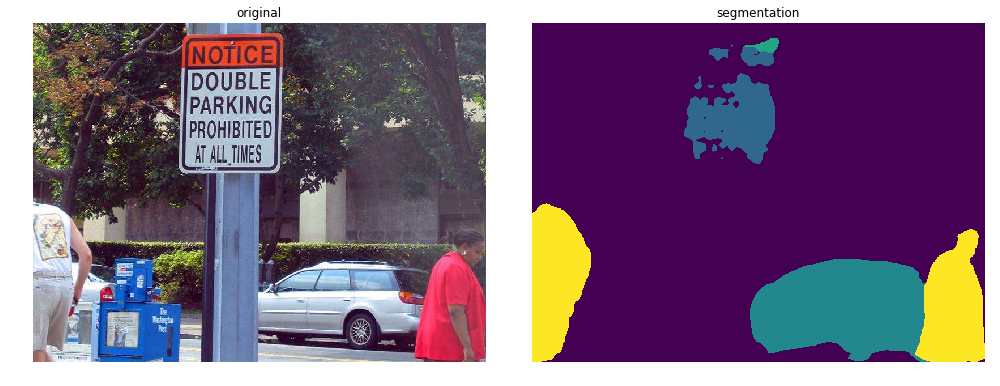

In [5]:
# Visualize the results using matplotlib

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(frame[:,:,[2,1,0]])
plt.subplot(122)
plt.axis('off')
plt.title('segmentation')
plt.imshow(labels)
plt.tight_layout()
plt.show()